In [1]:
import pandas as pd
import numpy as np
import csv
import re
import matplotlib.pyplot as plt
%matplotlib inline

import dateutil.parser
from dateutil import parser
from datetime import datetime
df1 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_170506.txt")
df2 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_170513.txt")
df3 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_170520.txt")
df4 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_170527.txt")
df = pd.concat([df1, df2, df3, df4])
df = df.reset_index()
df = df.drop("index",1)
df['EXITS'] = df["EXITS                                                               "]
df.drop("EXITS                                                               ", axis = 1, inplace = True)
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,00:00:00,REGULAR,6157740,2085315
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,04:00:00,REGULAR,6157777,2085319
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,08:00:00,REGULAR,6157810,2085353
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,12:00:00,REGULAR,6157963,2085453
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,16:00:00,REGULAR,6158212,2085529
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,20:00:00,REGULAR,6158521,2085589
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,00:00:00,REGULAR,6158637,2085612
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,04:00:00,REGULAR,6158654,2085617
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,08:00:00,REGULAR,6158661,2085641
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,12:00:00,REGULAR,6158703,2085730


In [2]:
df['new_key'] = df[['C/A', 'UNIT', 'SCP', 'STATION']].apply(lambda x: ' '.join(x), axis=1)
df['date_time'] = (df[['DATE', 'TIME']].apply(lambda x: ' '.join(x), axis=1).str.replace('/','-'))
df['parsed_datetime'] = df.apply(lambda row: parser.parse(row.date_time), axis=1)
# df['date'] = (df['parsed_datetime'].apply(lambda x: x.date()))
# df['entries_num'] = int(df['ENTRIES'])-int(df['ENTRIES'][1:])
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,new_key,date_time,parsed_datetime
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,00:00:00,REGULAR,6157740,2085315,A002 R051 02-00-00 59 ST,04-29-2017 00:00:00,2017-04-29 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,04:00:00,REGULAR,6157777,2085319,A002 R051 02-00-00 59 ST,04-29-2017 04:00:00,2017-04-29 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,08:00:00,REGULAR,6157810,2085353,A002 R051 02-00-00 59 ST,04-29-2017 08:00:00,2017-04-29 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,12:00:00,REGULAR,6157963,2085453,A002 R051 02-00-00 59 ST,04-29-2017 12:00:00,2017-04-29 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,16:00:00,REGULAR,6158212,2085529,A002 R051 02-00-00 59 ST,04-29-2017 16:00:00,2017-04-29 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,20:00:00,REGULAR,6158521,2085589,A002 R051 02-00-00 59 ST,04-29-2017 20:00:00,2017-04-29 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,00:00:00,REGULAR,6158637,2085612,A002 R051 02-00-00 59 ST,04-30-2017 00:00:00,2017-04-30 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,04:00:00,REGULAR,6158654,2085617,A002 R051 02-00-00 59 ST,04-30-2017 04:00:00,2017-04-30 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,08:00:00,REGULAR,6158661,2085641,A002 R051 02-00-00 59 ST,04-30-2017 08:00:00,2017-04-30 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,12:00:00,REGULAR,6158703,2085730,A002 R051 02-00-00 59 ST,04-30-2017 12:00:00,2017-04-30 12:00:00


In [3]:
station_id = pd.Categorical(df['new_key']).codes
df['station_id'] = station_id
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,new_key,date_time,parsed_datetime,station_id
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,00:00:00,REGULAR,6157740,2085315,A002 R051 02-00-00 59 ST,04-29-2017 00:00:00,2017-04-29 00:00:00,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,04:00:00,REGULAR,6157777,2085319,A002 R051 02-00-00 59 ST,04-29-2017 04:00:00,2017-04-29 04:00:00,0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,08:00:00,REGULAR,6157810,2085353,A002 R051 02-00-00 59 ST,04-29-2017 08:00:00,2017-04-29 08:00:00,0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,12:00:00,REGULAR,6157963,2085453,A002 R051 02-00-00 59 ST,04-29-2017 12:00:00,2017-04-29 12:00:00,0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,16:00:00,REGULAR,6158212,2085529,A002 R051 02-00-00 59 ST,04-29-2017 16:00:00,2017-04-29 16:00:00,0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,20:00:00,REGULAR,6158521,2085589,A002 R051 02-00-00 59 ST,04-29-2017 20:00:00,2017-04-29 20:00:00,0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,00:00:00,REGULAR,6158637,2085612,A002 R051 02-00-00 59 ST,04-30-2017 00:00:00,2017-04-30 00:00:00,0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,04:00:00,REGULAR,6158654,2085617,A002 R051 02-00-00 59 ST,04-30-2017 04:00:00,2017-04-30 04:00:00,0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,08:00:00,REGULAR,6158661,2085641,A002 R051 02-00-00 59 ST,04-30-2017 08:00:00,2017-04-30 08:00:00,0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,12:00:00,REGULAR,6158703,2085730,A002 R051 02-00-00 59 ST,04-30-2017 12:00:00,2017-04-30 12:00:00,0


In [4]:
df.drop(['C/A', 'UNIT', 'SCP', 'DIVISION', 'new_key', 'DATE', 'TIME', 'date_time', 'DESC'], axis = 1, inplace = True)
df.sort_values(['station_id','parsed_datetime'], ascending=[True,True])
df

,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id
0,59 ST,NQR456W,6157740,2085315,2017-04-29 00:00:00,0
1,59 ST,NQR456W,6157777,2085319,2017-04-29 04:00:00,0
2,59 ST,NQR456W,6157810,2085353,2017-04-29 08:00:00,0
3,59 ST,NQR456W,6157963,2085453,2017-04-29 12:00:00,0
4,59 ST,NQR456W,6158212,2085529,2017-04-29 16:00:00,0
5,59 ST,NQR456W,6158521,2085589,2017-04-29 20:00:00,0
6,59 ST,NQR456W,6158637,2085612,2017-04-30 00:00:00,0
7,59 ST,NQR456W,6158654,2085617,2017-04-30 04:00:00,0
8,59 ST,NQR456W,6158661,2085641,2017-04-30 08:00:00,0
9,59 ST,NQR456W,6158703,2085730,2017-04-30 12:00:00,0


In [5]:
df['entry_num'] = abs(df['ENTRIES'].diff())
df['exit_num'] = abs(df['EXITS'].diff())
df['station_diff'] = df['station_id'].diff()
df

,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id,entry_num,exit_num,station_diff
0,59 ST,NQR456W,6157740,2085315,2017-04-29 00:00:00,0,NaN,NaN,NaN
1,59 ST,NQR456W,6157777,2085319,2017-04-29 04:00:00,0,37.0,4.0,0.0
2,59 ST,NQR456W,6157810,2085353,2017-04-29 08:00:00,0,33.0,34.0,0.0
3,59 ST,NQR456W,6157963,2085453,2017-04-29 12:00:00,0,153.0,100.0,0.0
4,59 ST,NQR456W,6158212,2085529,2017-04-29 16:00:00,0,249.0,76.0,0.0
5,59 ST,NQR456W,6158521,2085589,2017-04-29 20:00:00,0,309.0,60.0,0.0
6,59 ST,NQR456W,6158637,2085612,2017-04-30 00:00:00,0,116.0,23.0,0.0
7,59 ST,NQR456W,6158654,2085617,2017-04-30 04:00:00,0,17.0,5.0,0.0
8,59 ST,NQR456W,6158661,2085641,2017-04-30 08:00:00,0,7.0,24.0,0.0
9,59 ST,NQR456W,6158703,2085730,2017-04-30 12:00:00,0,42.0,89.0,0.0


In [6]:
# keeps only differences between same stations and eliminates first record for each station since we have nothing to compare it to
df = df[df.station_diff == 0.0]
df

,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id,entry_num,exit_num,station_diff
1,59 ST,NQR456W,6157777,2085319,2017-04-29 04:00:00,0,37.0,4.0,0.0
2,59 ST,NQR456W,6157810,2085353,2017-04-29 08:00:00,0,33.0,34.0,0.0
3,59 ST,NQR456W,6157963,2085453,2017-04-29 12:00:00,0,153.0,100.0,0.0
4,59 ST,NQR456W,6158212,2085529,2017-04-29 16:00:00,0,249.0,76.0,0.0
5,59 ST,NQR456W,6158521,2085589,2017-04-29 20:00:00,0,309.0,60.0,0.0
6,59 ST,NQR456W,6158637,2085612,2017-04-30 00:00:00,0,116.0,23.0,0.0
7,59 ST,NQR456W,6158654,2085617,2017-04-30 04:00:00,0,17.0,5.0,0.0
8,59 ST,NQR456W,6158661,2085641,2017-04-30 08:00:00,0,7.0,24.0,0.0
9,59 ST,NQR456W,6158703,2085730,2017-04-30 12:00:00,0,42.0,89.0,0.0
10,59 ST,NQR456W,6158797,2085785,2017-04-30 16:00:00,0,94.0,55.0,0.0


In [7]:
df.loc[30:50]

,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id,entry_num,exit_num,station_diff
30,59 ST,NQR456W,6163517,2087485,2017-05-04 00:00:00,0,263.0,34.0,0.0
31,59 ST,NQR456W,6163534,2087487,2017-05-04 04:00:00,0,17.0,2.0,0.0
32,59 ST,NQR456W,6163576,2087581,2017-05-04 08:00:00,0,42.0,94.0,0.0
33,59 ST,NQR456W,6163739,2087856,2017-05-04 12:00:00,0,163.0,275.0,0.0
34,59 ST,NQR456W,6164051,2087916,2017-05-04 16:00:00,0,312.0,60.0,0.0
35,59 ST,NQR456W,6164865,2087987,2017-05-04 20:00:00,0,814.0,71.0,0.0
36,59 ST,NQR456W,6165120,2088020,2017-05-05 00:00:00,0,255.0,33.0,0.0
37,59 ST,NQR456W,6165147,2088024,2017-05-05 04:00:00,0,27.0,4.0,0.0
38,59 ST,NQR456W,6165183,2088112,2017-05-05 08:00:00,0,36.0,88.0,0.0
39,59 ST,NQR456W,6165346,2088396,2017-05-05 12:00:00,0,163.0,284.0,0.0


In [8]:
df['time'] = df.apply(lambda row: row.parsed_datetime.time(), axis=1)

/Users/matiasbeeck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
# df['weekday'] = df['parsed_datetime'].dt.weekday
# df['weekday_bin'] = df.apply(lambda row: 1 if df.weekday < 5 else 0, axis=1)

df['Weekday'] = df['parsed_datetime'].dt.weekday
df['Weekend'] = 0
df['Weekend'] = df['Weekday'] >= 5
df.drop('Weekday', axis=1, inplace = True)
df

/Users/matiasbeeck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/matiasbeeck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/matiasbeeck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id,entry_num,exit_num,station_diff,time,Weekend
1,59 ST,NQR456W,6157777,2085319,2017-04-29 04:00:00,0,37.0,4.0,0.0,04:00:00,True
2,59 ST,NQR456W,6157810,2085353,2017-04-29 08:00:00,0,33.0,34.0,0.0,08:00:00,True
3,59 ST,NQR456W,6157963,2085453,2017-04-29 12:00:00,0,153.0,100.0,0.0,12:00:00,True
4,59 ST,NQR456W,6158212,2085529,2017-04-29 16:00:00,0,249.0,76.0,0.0,16:00:00,True
5,59 ST,NQR456W,6158521,2085589,2017-04-29 20:00:00,0,309.0,60.0,0.0,20:00:00,True
6,59 ST,NQR456W,6158637,2085612,2017-04-30 00:00:00,0,116.0,23.0,0.0,00:00:00,True
7,59 ST,NQR456W,6158654,2085617,2017-04-30 04:00:00,0,17.0,5.0,0.0,04:00:00,True
8,59 ST,NQR456W,6158661,2085641,2017-04-30 08:00:00,0,7.0,24.0,0.0,08:00:00,True
9,59 ST,NQR456W,6158703,2085730,2017-04-30 12:00:00,0,42.0,89.0,0.0,12:00:00,True
10,59 ST,NQR456W,6158797,2085785,2017-04-30 16:00:00,0,94.0,55.0,0.0,16:00:00,True


In [10]:
df['line_sort'] = df.apply(lambda row: ''.join(sorted(row.LINENAME)), axis=1)


/Users/matiasbeeck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
officialdf = df

In [12]:
df.groupby(['STATION','line_sort'])[['line_sort']].count()


line_sort
STATION         line_sort              
1 AV            L                  1639
103 ST          1                   984
                6                   999
                BC                  492
103 ST-CORONA   7                  1502
104 ST          A                   820
                JZ                  588
110 ST          6                   993
111 ST          7                   820
                A                  1147
                J                   663
116 ST          23                 1320
                6                  1319
                BC                  999
116 ST-COLUMBIA 1                   984
121 ST          JZ                  652
125 ST          1                   835
                23                 1321
                456                2290
                ABCD               2632
135 ST          23                 2005
                BC                 1798
137 ST CITY COL 1                  1645
138/GRAND CONC  45                  492
14 ST           123FLM             5386
                ACEL               1636
14 ST-UNION SQ  456LNQRW           6224
145 ST          1                  1148
                3                   495
                ABCD               1488
...                                 ...
THIRTY THIRD ST 1                  2797
TIMES SQ-42 ST  1237ACENQRS        1476
                1237ACENQRSW       6737
TOMPKINSVILLE   1                  1162
TREMONT AV      BD                 1476
TWENTY THIRD ST 1                  1389
UNION ST        R                   999
UTICA AV        AC                 2132
V.CORTLANDT PK  1                   656
VAN SICLEN AV   3                   667
                JZ                  492
VAN SICLEN AVE  C                   492
VERNON-JACKSON  7                  2126
W 4 ST-WASH SQ  ABCDEFM            3139
W 8 ST-AQUARIUM FQ                 1311
WAKEFIELD/241   2                   820
WALL ST         23                 3634
                45                 4572
WEST FARMS SQ   25                 1467
WESTCHESTER SQ  6                   498
WHITEHALL S-FRY 1RW                2474
WHITLOCK AV     6                   983
WILSON AV       L                   735
WINTHROP ST     25                  660
WOODHAVEN BLVD  JZ                 1320
                MR                 1838
WOODLAWN        4                   820
WORLD TRADE CTR 23ACE              1761
YORK ST         F                   482
ZEREGA AV       6                   984

[465 rows x 1 columns]

In [13]:
df.groupby(['STATION','line_sort'])[['entry_num']].sum().sort_values(by=['entry_num'])


,,entry_num
STATION,line_sort,
BAY RIDGE AV,R,1.000000e+00
ORCHARD BEACH,6,7.700000e+01
BEACH 105 ST,AS,6.377000e+03
BROAD CHANNEL,AS,7.040000e+03
BEACH 98 ST,AS,1.265400e+04
ROCKAWAY PARK B,AS,1.635500e+04
BEACH 44 ST,A,1.814000e+04
121 ST,JZ,2.085300e+04
TOMPKINSVILLE,1,2.102400e+04


In [14]:
df[df.STATION == 'EASTCHSTER/DYRE'].sort_values(by='entry_num')
# df.loc[df.entry_num < 0, :]['STATION'].unique()

,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id,entry_num,exit_num,station_diff,time,Weekend,line_sort
195280,EASTCHSTER/DYRE,5,1334708,2553279,2017-04-29 05:00:00,4658,0.000000e+00,3.000000e+00,0.0,05:00:00,True,5
587674,EASTCHSTER/DYRE,5,5938157,7596902,2017-05-15 05:00:00,4659,0.000000e+00,0.000000e+00,0.0,05:00:00,False,5
587673,EASTCHSTER/DYRE,5,5938157,7596902,2017-05-15 01:00:00,4659,0.000000e+00,0.000000e+00,0.0,01:00:00,False,5
587672,EASTCHSTER/DYRE,5,5938157,7596902,2017-05-14 21:00:00,4659,0.000000e+00,0.000000e+00,0.0,21:00:00,True,5
587671,EASTCHSTER/DYRE,5,5938157,7596902,2017-05-14 17:00:00,4659,0.000000e+00,0.000000e+00,0.0,17:00:00,True,5
587670,EASTCHSTER/DYRE,5,5938157,7596902,2017-05-14 13:00:00,4659,0.000000e+00,0.000000e+00,0.0,13:00:00,True,5
195448,EASTCHSTER/DYRE,5,2523023,1046466,2017-04-29 05:00:00,4662,0.000000e+00,0.000000e+00,0.0,05:00:00,True,5
195449,EASTCHSTER/DYRE,5,2523023,1046466,2017-04-29 09:00:00,4662,0.000000e+00,0.000000e+00,0.0,09:00:00,True,5
195451,EASTCHSTER/DYRE,5,2523024,1046466,2017-04-29 17:00:00,4662,0.000000e+00,0.000000e+00,0.0,17:00:00,True,5
195452,EASTCHSTER/DYRE,5,2523024,1046466,2017-04-29 21:00:00,4662,0.000000e+00,0.000000e+00,0.0,21:00:00,True,5


In [15]:
df = df.reset_index()
df = df.drop('index', 1)
df[df.STATION == 'EASTCHSTER/DYRE'].sort_values(by='entry_num')


,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id,entry_num,exit_num,station_diff,time,Weekend,line_sort
190630,EASTCHSTER/DYRE,5,1334708,2553279,2017-04-29 05:00:00,4658,0.000000e+00,3.000000e+00,0.0,05:00:00,True,5
573650,EASTCHSTER/DYRE,5,5938157,7596902,2017-05-15 05:00:00,4659,0.000000e+00,0.000000e+00,0.0,05:00:00,False,5
573649,EASTCHSTER/DYRE,5,5938157,7596902,2017-05-15 01:00:00,4659,0.000000e+00,0.000000e+00,0.0,01:00:00,False,5
573648,EASTCHSTER/DYRE,5,5938157,7596902,2017-05-14 21:00:00,4659,0.000000e+00,0.000000e+00,0.0,21:00:00,True,5
573647,EASTCHSTER/DYRE,5,5938157,7596902,2017-05-14 17:00:00,4659,0.000000e+00,0.000000e+00,0.0,17:00:00,True,5
573646,EASTCHSTER/DYRE,5,5938157,7596902,2017-05-14 13:00:00,4659,0.000000e+00,0.000000e+00,0.0,13:00:00,True,5
190794,EASTCHSTER/DYRE,5,2523023,1046466,2017-04-29 05:00:00,4662,0.000000e+00,0.000000e+00,0.0,05:00:00,True,5
190795,EASTCHSTER/DYRE,5,2523023,1046466,2017-04-29 09:00:00,4662,0.000000e+00,0.000000e+00,0.0,09:00:00,True,5
190797,EASTCHSTER/DYRE,5,2523024,1046466,2017-04-29 17:00:00,4662,0.000000e+00,0.000000e+00,0.0,17:00:00,True,5
190798,EASTCHSTER/DYRE,5,2523024,1046466,2017-04-29 21:00:00,4662,0.000000e+00,0.000000e+00,0.0,21:00:00,True,5


In [16]:
df.iloc[190820:190840]

,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id,entry_num,exit_num,station_diff,time,Weekend,line_sort
190820,EASTCHSTER/DYRE,5,2524506,1046984,2017-05-03 13:00:00,4662,5.300000e+01,6.000000e+00,0.0,13:00:00,False,5
190821,EASTCHSTER/DYRE,5,2524589,1047045,2017-05-03 17:00:00,4662,8.300000e+01,6.100000e+01,0.0,17:00:00,False,5
190822,EASTCHSTER/DYRE,5,2524663,1047143,2017-05-03 21:00:00,4662,7.400000e+01,9.800000e+01,0.0,21:00:00,False,5
190823,EASTCHSTER/DYRE,5,2524674,1047160,2017-05-04 01:00:00,4662,1.100000e+01,1.700000e+01,0.0,01:00:00,False,5
190824,EASTCHSTER/DYRE,5,2524680,1047163,2017-05-04 05:00:00,4662,6.000000e+00,3.000000e+00,0.0,05:00:00,False,5
190825,EASTCHSTER/DYRE,5,2525010,1047200,2017-05-04 09:00:00,4662,3.300000e+02,3.700000e+01,0.0,09:00:00,False,5
190826,EASTCHSTER/DYRE,5,2525075,1047213,2017-05-04 13:00:00,4662,6.500000e+01,1.300000e+01,0.0,13:00:00,False,5
190827,EASTCHSTER/DYRE,5,1560221483,1728055978,2017-05-05 09:00:00,4662,1.557696e+09,1.727009e+09,0.0,09:00:00,False,5
190828,EASTCHSTER/DYRE,5,1560221425,1728055986,2017-05-05 13:00:00,4662,5.800000e+01,8.000000e+00,0.0,13:00:00,False,5
190829,EASTCHSTER/DYRE,5,1560221334,1728056067,2017-05-05 17:00:00,4662,9.100000e+01,8.100000e+01,0.0,17:00:00,False,5


In [17]:
df[df.STATION == '72 ST'].sort_values(by='entry_num')


,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id,entry_num,exit_num,station_diff,time,Weekend,line_sort
324871,72 ST,123,0,1968,2017-05-12 13:00:00,3250,0.0,0.000000e+00,0.0,13:00:00,False,123
324740,72 ST,123,6200,0,2017-05-11 05:00:00,3247,0.0,0.000000e+00,0.0,05:00:00,False,123
324739,72 ST,123,6200,0,2017-05-11 01:00:00,3247,0.0,0.000000e+00,0.0,01:00:00,False,123
324735,72 ST,123,6196,0,2017-05-10 09:00:00,3247,0.0,0.000000e+00,0.0,09:00:00,False,123
324734,72 ST,123,6196,0,2017-05-10 05:00:00,3247,0.0,0.000000e+00,0.0,05:00:00,False,123
324733,72 ST,123,6196,0,2017-05-10 01:00:00,3247,0.0,0.000000e+00,0.0,01:00:00,False,123
324730,72 ST,123,6194,0,2017-05-09 13:00:00,3247,0.0,0.000000e+00,0.0,13:00:00,False,123
324729,72 ST,123,6194,0,2017-05-09 09:00:00,3247,0.0,0.000000e+00,0.0,09:00:00,False,123
324741,72 ST,123,6200,0,2017-05-11 09:00:00,3247,0.0,0.000000e+00,0.0,09:00:00,False,123
324728,72 ST,123,6194,0,2017-05-09 05:00:00,3247,0.0,0.000000e+00,0.0,05:00:00,False,123


In [18]:
df.iloc[132440:132450]

,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id,entry_num,exit_num,station_diff,time,Weekend,line_sort
132440,72 ST,123,1759457,1060757,2017-05-05 17:00:00,3241,787.0,1.810000e+02,0.0,17:00:00,False,123
132441,72 ST,123,1760344,1061003,2017-05-05 21:00:00,3241,887.0,2.460000e+02,0.0,21:00:00,False,123
132442,72 ST,123,8105279,6934001,2017-04-29 05:00:00,3242,0.0,2.200000e+01,0.0,05:00:00,True,123
132443,72 ST,123,8105279,6934126,2017-04-29 09:00:00,3242,0.0,1.250000e+02,0.0,09:00:00,True,123
132444,72 ST,123,8105279,6934505,2017-04-29 13:00:00,3242,0.0,3.790000e+02,0.0,13:00:00,True,123
132445,72 ST,123,8105279,6934924,2017-04-29 17:00:00,3242,0.0,4.190000e+02,0.0,17:00:00,True,123
132446,72 ST,123,8105279,6935278,2017-04-29 21:00:00,3242,0.0,3.540000e+02,0.0,21:00:00,True,123
132447,72 ST,123,691260128,1758148378,2017-04-30 13:00:00,3242,683154849.0,1.751213e+09,0.0,13:00:00,True,123
132448,72 ST,123,691259656,1758148759,2017-04-30 17:00:00,3242,472.0,3.810000e+02,0.0,17:00:00,True,123
132449,72 ST,123,691259285,1758149040,2017-04-30 21:00:00,3242,371.0,2.810000e+02,0.0,21:00:00,True,123


In [19]:
pre_removaldf = df

In [20]:
# DROPPING ENTRIES AND EXIT OUTLIERS
df = df.drop(df[df.entry_num > 10000].index)
df = df.drop(df[df.exit_num > 10000].index)

df.reset_index(drop=True)


,STATION,LINENAME,ENTRIES,EXITS,parsed_datetime,station_id,entry_num,exit_num,station_diff,time,Weekend,line_sort
0,59 ST,NQR456W,6157777,2085319,2017-04-29 04:00:00,0,37.0,4.0,0.0,04:00:00,True,456NQRW
1,59 ST,NQR456W,6157810,2085353,2017-04-29 08:00:00,0,33.0,34.0,0.0,08:00:00,True,456NQRW
2,59 ST,NQR456W,6157963,2085453,2017-04-29 12:00:00,0,153.0,100.0,0.0,12:00:00,True,456NQRW
3,59 ST,NQR456W,6158212,2085529,2017-04-29 16:00:00,0,249.0,76.0,0.0,16:00:00,True,456NQRW
4,59 ST,NQR456W,6158521,2085589,2017-04-29 20:00:00,0,309.0,60.0,0.0,20:00:00,True,456NQRW
5,59 ST,NQR456W,6158637,2085612,2017-04-30 00:00:00,0,116.0,23.0,0.0,00:00:00,True,456NQRW
6,59 ST,NQR456W,6158654,2085617,2017-04-30 04:00:00,0,17.0,5.0,0.0,04:00:00,True,456NQRW
7,59 ST,NQR456W,6158661,2085641,2017-04-30 08:00:00,0,7.0,24.0,0.0,08:00:00,True,456NQRW
8,59 ST,NQR456W,6158703,2085730,2017-04-30 12:00:00,0,42.0,89.0,0.0,12:00:00,True,456NQRW
9,59 ST,NQR456W,6158797,2085785,2017-04-30 16:00:00,0,94.0,55.0,0.0,16:00:00,True,456NQRW


In [32]:
import matplotlib.style as style
style.use('seaborn-poster')

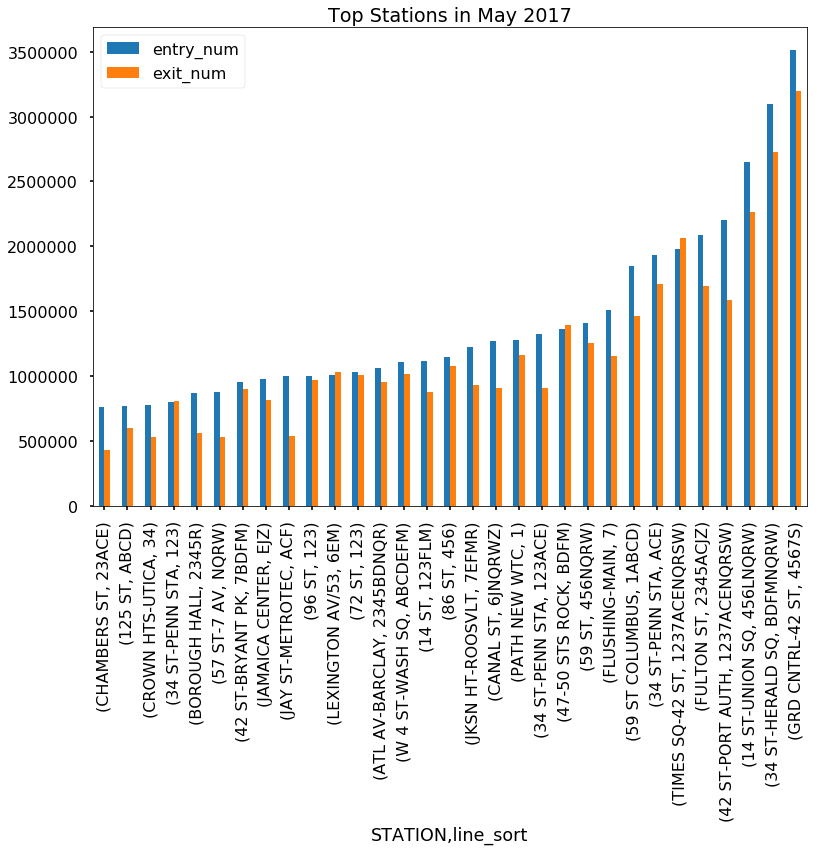

In [38]:
graphdf = df.groupby(['STATION','line_sort'])[['entry_num', 'exit_num']].sum().sort_values(by=['entry_num'])
graphdf_cut = graphdf[graphdf.entry_num > 750000]
graphdf_cut.plot(kind='bar', title = "Top Stations in May 2017");

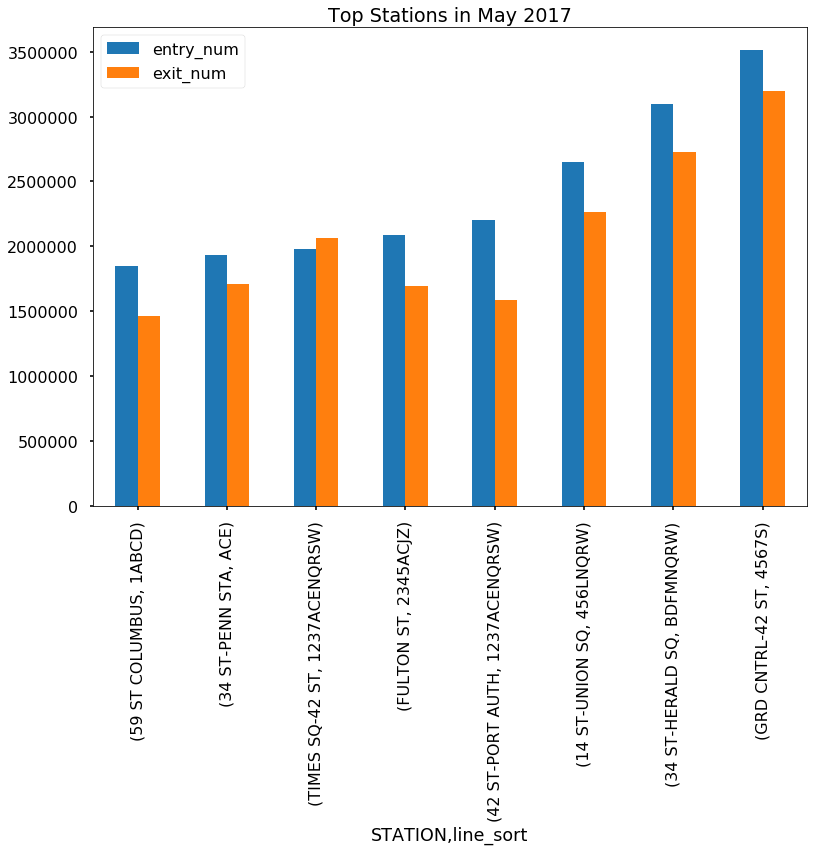

In [40]:
graphdf_cut.tail(8).plot(kind='bar', title = "Top Stations in May 2017");

In [22]:
# df['abs_entry_num'] = df.apply(lambda row: abs(row.entry_num), axis=1)
# df['abs_exit_num'] = df.apply(lambda row: abs(row.exit_num), axis=1)
# df.sort_values(['abs_entry_num'], ascending=[False])


In [23]:
# df.loc[df.station_id == 3645, :]

In [24]:
# df.station_id.value_counts().sort_values()

In [25]:
# df.loc[df.station_id == 2620, :]

In [26]:
# groupedstations_df = df.groupby(['station_id','STATION'])[['entry_num']].sum()
# groupedstations_df.sort_values(['entry_num'], ascending=[False])